In [34]:
import anndata as an
import scanpy as sc

In [35]:
hips = an.read_h5ad("dataset/hiPSC.h5ad")

c:\Users\Mick\PycharmProjects\BPEXA\in_house_data\venv\in-house\.venv\Lib\site-packages\anndata\compat\__init__.py:358: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [36]:
hips.T

AnnData object with n_obs × n_vars = 23543 × 4694
    obs: 'features'
    var: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'run', 'sample_name', 'percent.mt', 'percent.dissoc', 'RNA_snn_res.0.3', 'seurat_clusters', 'RNA_snn_res.0.22'
    uns: 'neighbors'
    varm: 'X_mnn', 'X_umap'
    varp: 'distances'

In [37]:
tysr = an.read_h5ad("dataset/tyser.h5ad")


In [51]:
#tysr.T
tysr.obs

,orig.ident,nCount_RNA,nFeature_RNA,Source.Name,Characteristics.sampling.site.,Characteristics.inferred.cell.type...authors.labels.,Characteristics.inferred.cell.type...ontology.labels.,cluster_id,sub_cluster,origin,run,sample_name,timepoint,percent.mt
SS.sc7786612,0,259888.990001,6942,SS.sc7786612,rostral,endodermal cell,endodermal cell,Endoderm,DE(P),tyser,tyser,tyser,tyser,1.304482
SS.sc7786605,0,437911.014986,6140,SS.sc7786605,rostral,advanced mesoderm,mesoderm cell,Advanced Mesoderm,Advanced Mesoderm,tyser,tyser,tyser,tyser,1.295160
SS.sc7785737,0,322351.983054,3800,SS.sc7785737,caudal,primitive streak,primitive streak cell,Primitive Streak,Primitive Streak,tyser,tyser,tyser,tyser,1.294179
SS.sc7785398,0,394318.996000,2964,SS.sc7785398,yolk sac,yolk sac mesoderm,mesenchyme of yolk sac,ExE Mesoderm,YS Mesoderm,tyser,tyser,tyser,tyser,1.423720
SS.sc7788091,0,298217.993000,5030,SS.sc7788091,caudal,axial mesoderm,chordamesodermal cell,Axial Mesoderm,Axial Mesoderm,tyser,tyser,tyser,tyser,1.327328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS.sc7785965,0,226569.027995,6361,SS.sc7785965,caudal,epiblast cell,epiblast cell,Epiblast,Epiblast,tyser,tyser,tyser,tyser,1.675409
SS.sc7788259,0,353921.980998,4647,SS.sc7788259,caudal,primitive streak,primitive streak cell,Primitive Streak,Primitive Streak,tyser,tyser,tyser,tyser,1.615045
SS.sc7786123,0,366998.009999,2822,SS.sc7786123,caudal,primitive streak,primitive streak cell,Primitive Streak,Primitive Streak,tyser,tyser,tyser,tyser,1.602395
SS.sc7786212,0,459601.642974,6110,SS.sc7786212,caudal,epiblast cell,epiblast cell,Epiblast,Epiblast,tyser,tyser,tyser,tyser,1.150624


In [39]:
raw_merge = sc.AnnData.concatenate(hips,tysr)

inner_merge = an.concat([hips,tysr],join="inner", label="dataset", keys=["reference", "query"])

C:\Users\Mick\AppData\Local\Temp\ipykernel_18484\106952039.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  raw_merge = sc.AnnData.concatenate(hips,tysr)


In [53]:
sc.pp.neighbors(raw_merge)
sc.pp.neighbors(inner_merge)

In [41]:
sc.tl.umap(raw_merge)
sc.tl.umap(inner_merge)

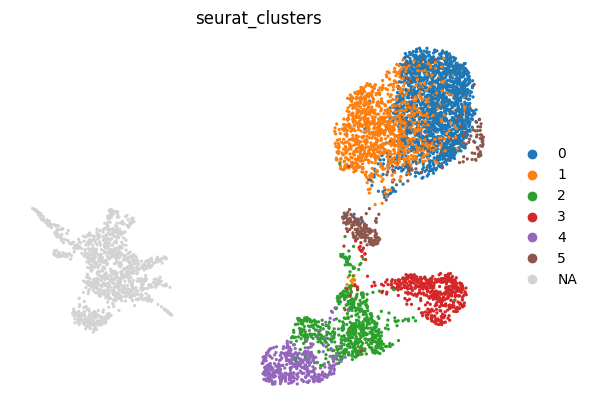

In [52]:
sc.pl.umap(raw_merge, color='seurat_clusters', 
           legend_fontsize='medium', size=22, frameon=False)

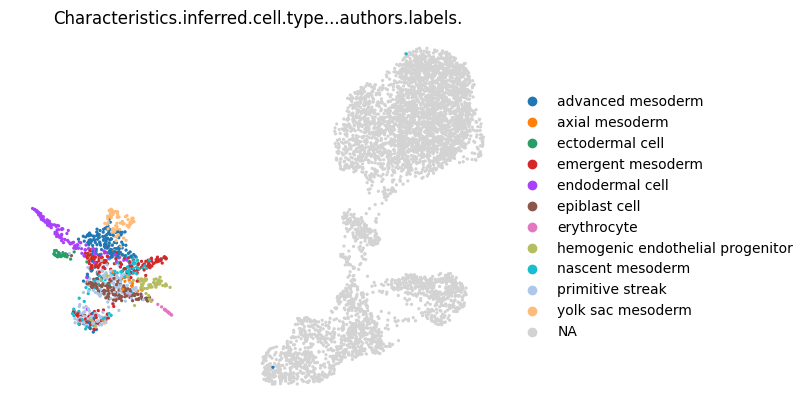

In [50]:
sc.pl.umap(raw_merge, color='Characteristics.inferred.cell.type...authors.labels.', 
           legend_fontsize='medium', size=22, frameon=False)

In [ ]:
#raw_merge

AnnData object with n_obs × n_vars = 5763 × 21482
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'run', 'sample_name', 'percent.mt', 'dataset'
    uns: 'pca', 'neighbors', 'umap', 'sample_name_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

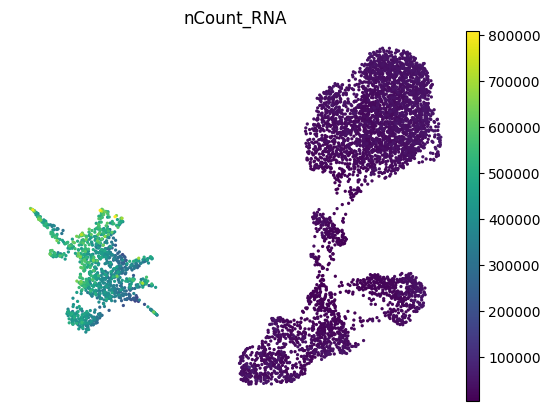

In [44]:

sc.pl.umap(inner_merge, color='nCount_RNA', 
           legend_fontsize='medium', size=22, frameon=False)


In [45]:
hips.var

,features
AL627309.1,AL627309.1
AL627309.5,AL627309.5
LINC01409,LINC01409
LINC01128,LINC01128
LINC00115,LINC00115
...,...
AC234781.1,AC234781.1
ZFY-AS1,ZFY-AS1
AC012078.2,AC012078.2
AC011751.1,AC011751.1
